In [1]:
from yugiquery import *

header("Bandai")

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Bandai - Execution started 03/04/2023 04:00 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

---

# Data aquisition

## Fetch online data

In [2]:
timestamp = pd.Timestamp.now()

In [3]:
bandai_df = fetch_bandai()

120 results


# Check changes

## Load previous data

In [4]:
# Get list of files
files_list = sorted(
    glob.glob("../data/all_bandai_*.csv"), key=os.path.getctime, reverse=True
)
# Get second newest file if exist
if files_list:
    latest_file = files_list[0]
    # Load csv avoiding converting "NA" to NaN
    previous_df = pd.read_csv(
        latest_file, dtype=object, keep_default_na=False, na_values=[""]
    )
    # Force dtypes to match current df
    previous_df = previous_df.astype(
        bandai_df[previous_df.columns.intersection(bandai_df.columns)].dtypes.to_dict()
    )
    previous_ts = pd.to_datetime(
        os.path.basename(latest_file).split("_")[-1].rstrip(".csv")
    )
    print("File loaded")
else:
    previous_df = None
    print("No older files")

File loaded

## Generate changelog

In [5]:
if previous_df is None:
    changelog = None
    print("Skipped")
else:
    changelog = generate_changelog(previous_df, bandai_df, col="Name")
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(
            f'../data/bandai_changelog_{previous_ts.isoformat(timespec="minutes")}_{timestamp.isoformat(timespec="minutes")}.csv',
            index=True,
        )
        print("Changelog saved")

No changes

## Save data

In [6]:
if changelog is not None and changelog.empty:
    print("No changes. New data not saved")
else:
    bandai_df.to_csv(
        f'../data/all_bandai_{timestamp.isoformat(timespec="minutes")}.csv', index=False
    )
    print("Data saved")

No changes. New data not saved

# Data visualization

In [7]:
bandai_df

,Name,Card type,Monster type,DEF,Set,Card number,Ability,Rule,ATK,Level,Page name,Page URL,Modification date
0,Megamorph,Spell Card,NaN,NaN,Yu-Gi-Oh! Bandai OCG: 3rd Generation,91,NaN,NaN,NaN,NaN,Megamorph (Bandai),https://yugipedia.com/wiki/Megamorph_(Bandai),2015-04-05 03:56:57
1,Horn of the Unicorn,Equip Card,NaN,NaN,Yu-Gi-Oh! Bandai OCG: 2nd Generation,51,NaN,NaN,NaN,NaN,Horn of the Unicorn (Bandai),https://yugipedia.com/wiki/Horn_of_the_Unicorn...,2019-02-03 16:09:34
2,Rock-Gun,Monster Card,Warrior,2000,Yu-Gi-Oh! Bandai OCG: 3rd Generation,103,NaN,9,1500,5,Rock-Gun,https://yugipedia.com/wiki/Rock-Gun,2019-02-04 16:27:05
3,Kazejin,Monster Card,Black Magic,2200,Yu-Gi-Oh! Bandai OCG: 2nd Generation,45,NaN,NaN,2400,6,Kazejin (Bandai),https://yugipedia.com/wiki/Kazejin_(Bandai),2019-02-03 14:28:19
4,Skull Servant,Monster Card,Fiend,300,Yu-Gi-Oh! Bandai OCG: 3rd Generation,90,NaN,2,500,2,Skull Servant (Bandai),https://yugipedia.com/wiki/Skull_Servant_(Bandai),2019-02-04 16:07:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Wicked Chain,Spell Card,NaN,NaN,Yu-Gi-Oh! Bandai OCG: Promotional Cards,NaN,NaN,NaN,NaN,NaN,Wicked Chain,https://yugipedia.com/wiki/Wicked_Chain,2019-02-03 19:21:04
116,The Wicked Worm Beast,Monster Card,Fiend,600,Yu-Gi-Oh! Bandai OCG: 3rd Generation,94,NaN,5,2400,5,The Wicked Worm Beast (Bandai),https://yugipedia.com/wiki/The_Wicked_Worm_Bea...,2019-02-04 16:11:42
117,Yellow Hecate,Monster Card,Black Magic,1500,Yu-Gi-Oh! Bandai OCG: 3rd Generation,98,NaN,NaN,1500,4,Yellow Hecate,https://yugipedia.com/wiki/Yellow_Hecate,2019-02-04 16:18:11
118,Yugi Muto,Character Card,NaN,NaN,Yu-Gi-Oh! Bandai OCG: 1st Generation,1,Look Ahead,1,NaN,6,Yugi Muto (Bandai),https://yugipedia.com/wiki/Yugi_Muto_(Bandai),2019-02-06 02:35:41


## Card type

In [8]:
print("Total number of card types:", bandai_df["Card type"].nunique())

Total number of card types:

5

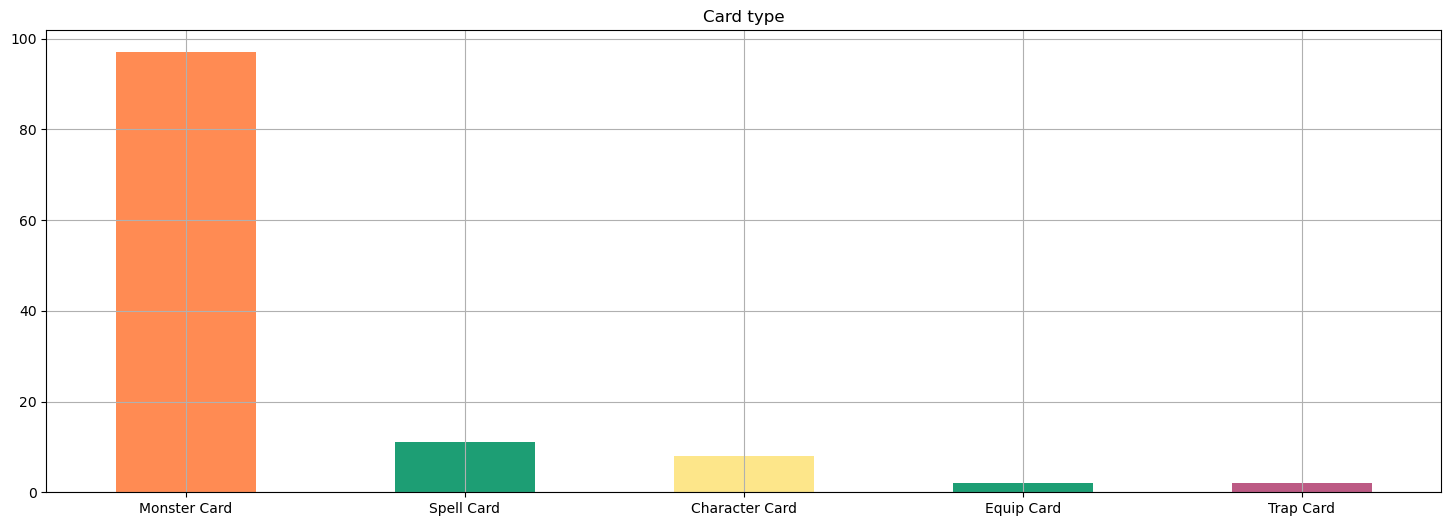

In [9]:
card_type_colors = [colors_dict[i] for i in bandai_df["Card type"].value_counts().index]
bandai_df["Card type"].value_counts().plot.bar(
    figsize=(18, 6), grid=True, rot=0, color=card_type_colors, title="Card type"
)
plt.show()

## ATK

In [10]:
print("Total number of ATK values:", bandai_df["ATK"].nunique())

Total number of ATK values:

27

In [11]:
bandai_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "ATK"
).nunique().sort_index(key=lambda x: pd.to_numeric(x, errors="coerce"))

,Name,Monster type,DEF,Set,Card number,Ability,Rule,Level,Modification date
ATK,,,,,,,,,
100,1,1,1,1,1,0,0,1,1
200,5,1,2,2,5,0,0,2,5
400,1,1,1,1,1,0,0,1,1
500,2,2,2,2,2,0,2,1,2
600,2,2,2,1,2,0,2,2,2
800,3,3,3,3,3,0,2,2,3
900,1,1,1,1,1,0,1,1,1
1000,3,2,3,2,3,0,2,2,3
1200,2,2,2,2,2,0,2,2,2


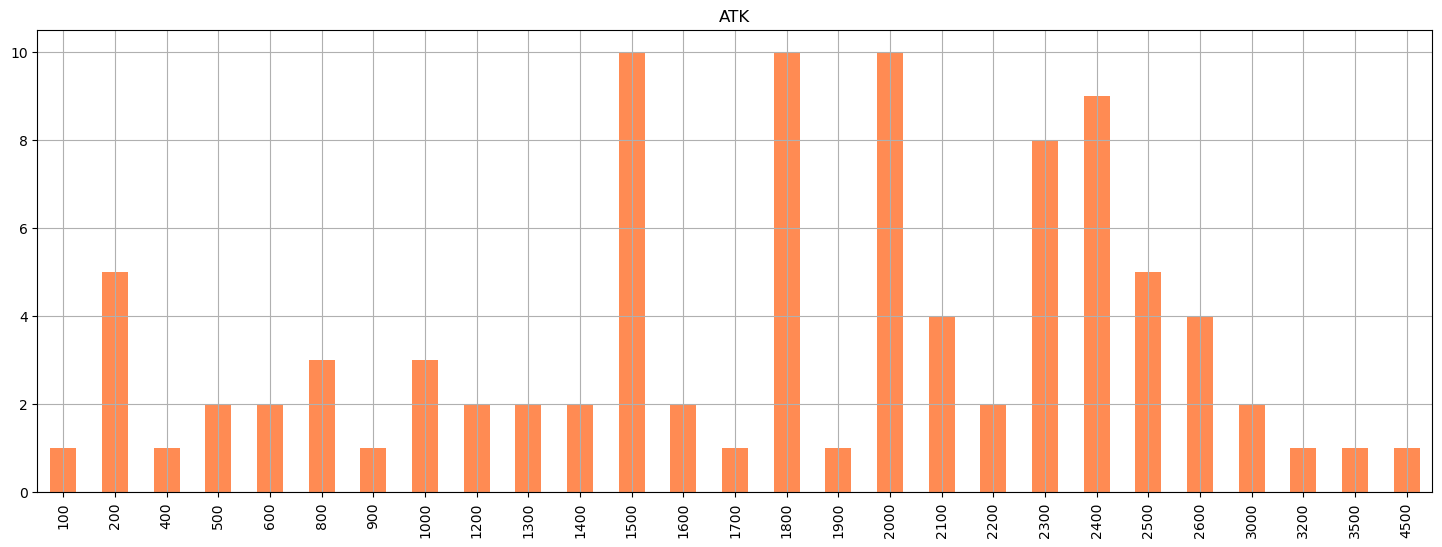

In [12]:
atk_colors = colors_dict["Monster Card"]
bandai_df["ATK"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(figsize=(18, 6), grid=True, color=atk_colors, title="ATK")
plt.show()

## DEF

In [13]:
print("Total number of DEF values:", bandai_df["DEF"].nunique())

Total number of DEF values:

27

In [14]:
bandai_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "DEF"
).nunique().sort_index(key=lambda x: pd.to_numeric(x, errors="coerce"))

,Name,Monster type,Set,Card number,Ability,Rule,ATK,Level,Modification date
DEF,,,,,,,,,
0,2,1,1,2,0,2,2,2,2
200,1,1,1,1,0,0,1,1,1
300,5,1,3,5,0,1,2,2,5
400,3,3,2,3,0,2,3,3,3
500,1,1,1,1,0,1,1,1,1
600,5,4,3,5,0,4,5,3,5
700,4,2,2,4,0,2,2,2,4
800,3,3,2,3,0,3,2,3,3
900,2,2,2,2,0,1,2,2,2


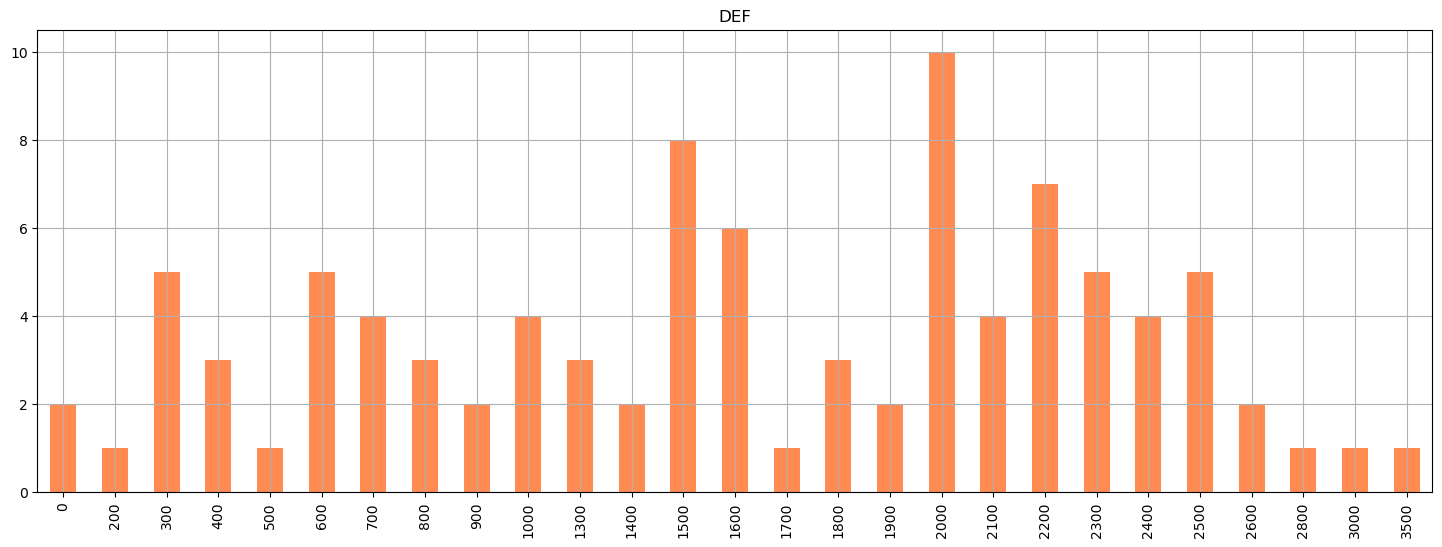

In [15]:
def_colors = colors_dict["Monster Card"]
bandai_df["DEF"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(figsize=(18, 6), grid=True, color=def_colors, title="DEF")
plt.show()

## Level

In [16]:
bandai_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "Level"
).nunique().sort_index(key=lambda x: pd.to_numeric(x, errors="coerce"))

,Name,Monster type,DEF,Set,Card number,Ability,Rule,ATK,Modification date
Level,,,,,,,,,
1,5,1,2,2,5,0,1,2,5
2,4,3,4,3,4,0,2,3,4
3,3,2,3,2,3,0,3,3,3
4,17,8,10,3,17,2,10,9,17
5,34,10,17,3,34,1,13,15,34
6,23,10,15,3,23,2,10,12,23
7,10,6,7,2,10,1,6,5,10
8,5,1,4,3,6,1,2,4,7


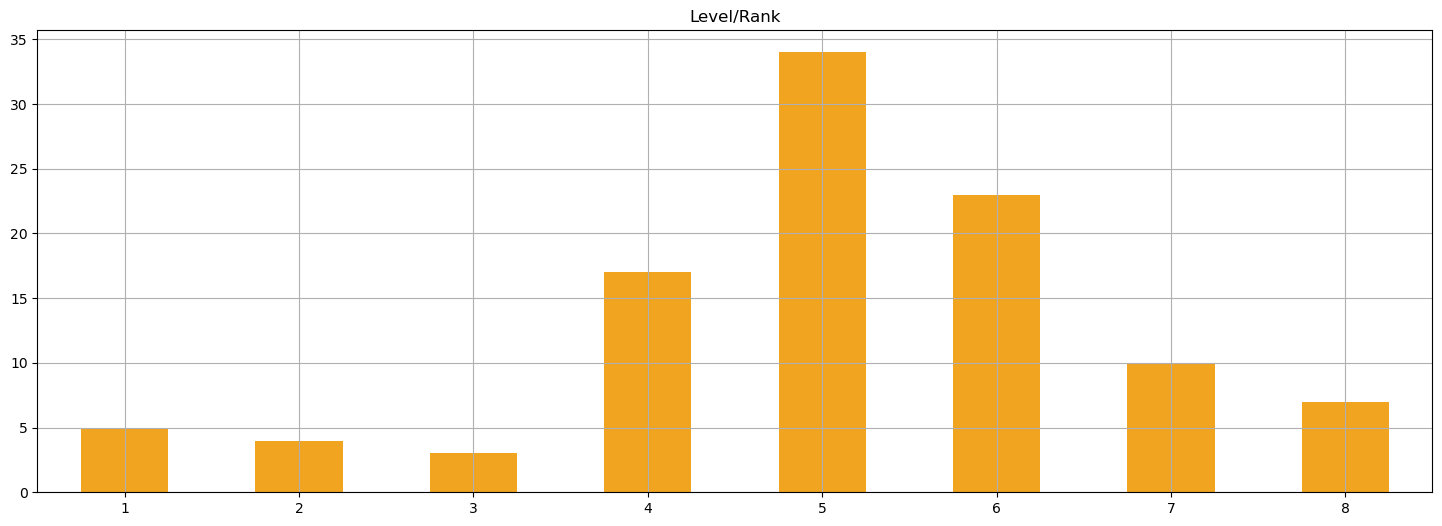

In [17]:
level_colors = colors_dict["Level"]
bandai_df["Level"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(figsize=(18, 6), grid=True, rot=0, color=level_colors, title="Level/Rank")
plt.show()

### ATK statistics

In [18]:
bandai_df[["Level", "ATK"]].apply(pd.to_numeric, errors="coerce").dropna().astype(
    int
).groupby("Level").describe()

ATK                                                                  
      count         mean          std     min     25%     50%     75%     max
Level                                                                        
1       5.0   280.000000   178.885438   200.0   200.0   200.0   200.0   600.0
2       4.0   325.000000   206.155281   100.0   175.0   350.0   500.0   500.0
3       3.0  1366.666667   513.160144   800.0  1150.0  1500.0  1650.0  1800.0
4      15.0  1626.666667   400.832467   600.0  1500.0  1600.0  1800.0  2400.0
5      33.0  1742.424242   559.033934   400.0  1400.0  2000.0  2100.0  2500.0
6      21.0  2104.761905   380.100237  1200.0  1900.0  2300.0  2300.0  2600.0
7       9.0  2511.111111   358.623913  1800.0  2400.0  2500.0  2600.0  3200.0
8       5.0  3000.000000  1274.754878  1000.0  3000.0  3000.0  3500.0  4500.0

### DEF statistics

In [19]:
bandai_df[["Level", "DEF"]].apply(pd.to_numeric, errors="coerce").dropna().astype(
    int
).groupby("Level").describe()

DEF                                                                 
      count         mean         std     min     25%     50%     75%     max
Level                                                                       
1       5.0   320.000000   44.721360   300.0   300.0   300.0   300.0   400.0
2       4.0   475.000000  359.397644   200.0   275.0   350.0   550.0  1000.0
3       3.0   466.666667  416.333200     0.0   300.0   600.0   700.0   800.0
4      15.0  1073.333333  582.441495     0.0   700.0   900.0  1500.0  2200.0
5      33.0  1663.636364  601.985352   400.0  1400.0  1900.0  2100.0  2500.0
6      21.0  1990.476190  611.477524   900.0  1500.0  2100.0  2300.0  3500.0
7       9.0  2200.000000  364.005494  1600.0  2000.0  2300.0  2500.0  2600.0
8       5.0  2200.000000  758.287544  1000.0  2000.0  2500.0  2500.0  3000.0

## Monster type

In [20]:
print("Total number of monster types:", bandai_df["Monster type"].nunique())

Total number of monster types:

15

In [21]:
bandai_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "Monster type"
).nunique()

,Name,DEF,Set,Card number,Ability,Rule,ATK,Level,Modification date
Monster type,,,,,,,,,
Beast,4,4,3,4,0,2,2,3,4
Beast-Warrior,5,4,2,5,0,4,5,3,5
Black Magic,12,7,4,11,0,3,7,4,12
Dinosaur,5,5,3,5,0,4,5,2,5
Dragon,11,8,3,12,0,7,8,5,13
Dragon Magic,1,1,1,1,0,1,1,1,1
Fiend,18,12,3,18,0,8,12,6,18
Illusion Magic,2,2,2,2,0,0,2,1,2
Insect,7,5,3,7,0,6,7,6,7


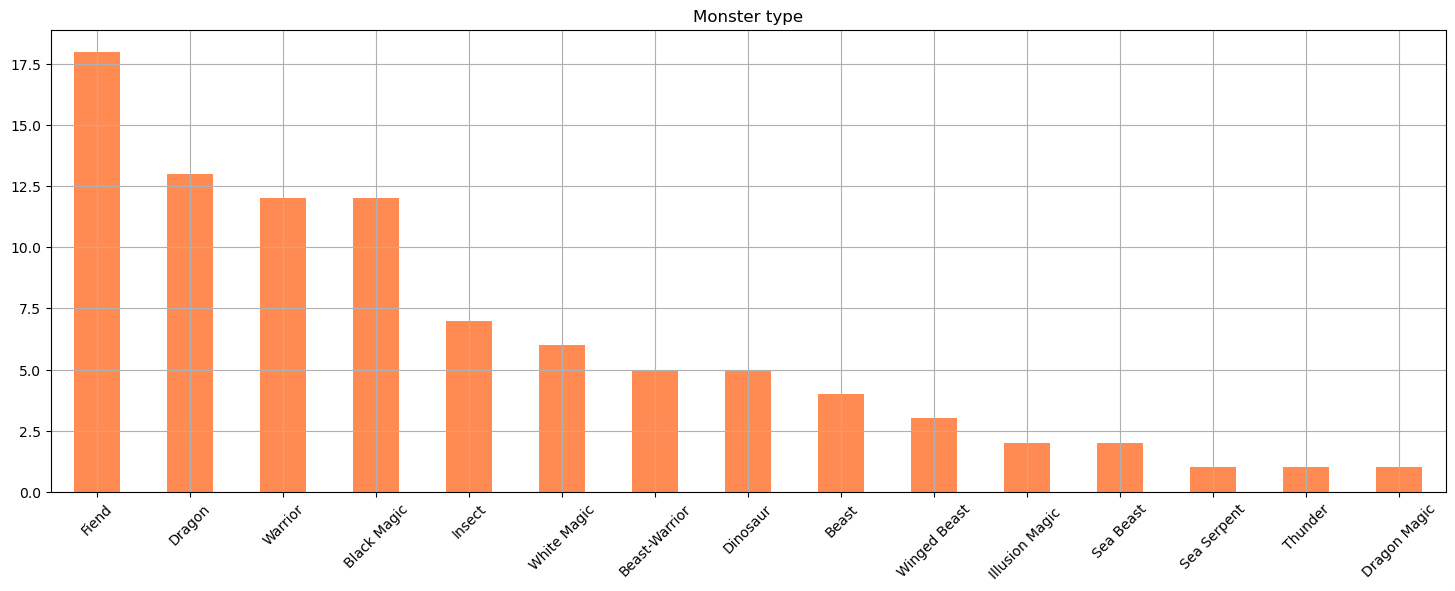

In [22]:
monster_type_colors = colors_dict["Monster Card"]
bandai_df["Monster type"].value_counts().plot.bar(
    figsize=(18, 6), grid=True, rot=45, color=monster_type_colors, title="Monster type"
)
plt.show()

## Set

In [23]:
print("Total number of sets:", bandai_df["Set"].nunique())

Total number of sets:

4

In [24]:
bandai_df.drop(columns=["Page name", "Page URL"]).groupby("Set").nunique()

,Name,Card type,Monster type,DEF,Card number,Ability,Rule,ATK,Level,Modification date
Set,,,,,,,,,,
Yu-Gi-Oh! Bandai OCG: 1st Generation,40,2,12,18,41,8,9,18,7,41
Yu-Gi-Oh! Bandai OCG: 2nd Generation,48,4,13,21,48,0,13,19,7,48
Yu-Gi-Oh! Bandai OCG: 3rd Generation,26,2,8,10,26,0,13,10,6,26
Yu-Gi-Oh! Bandai OCG: Promotional Cards,5,3,2,1,0,0,0,1,1,5


# Epilogue

In [25]:
benchmark("bandai", timestamp)

In [26]:
footer()

<div align='right'>
    Execution completed 03/04/2023 04:01 UTC
</div>

## HTML export

In [27]:
# Save notebook on disck before generating HTML report
save_notebook()

Notebook saved to disk

In [28]:
! jupyter nbconvert Bandai.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

[NbConvertApp] Converting notebook Bandai.ipynb to HTML


[NbConvertApp] Writing 782323 bytes to ../Bandai.html


## Git

In [ ]:
! git add "../*[Bb]andai*"

In [ ]:
! git commit -m {"'Bandai update-" + timestamp.isoformat() + "'"}